# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

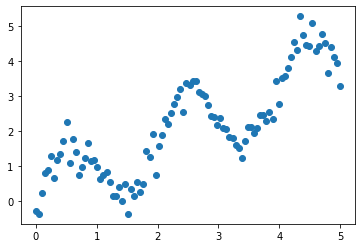

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.6599162156806996


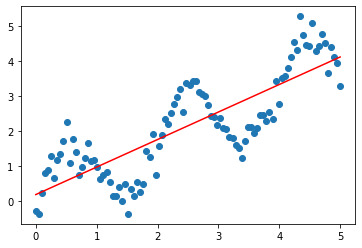

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

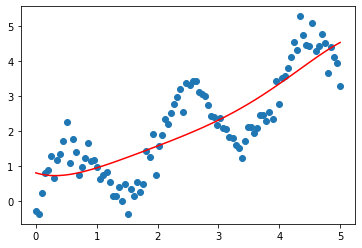

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.54017253  1.05248757 -0.46072424  0.09751853 -0.00744096]
interception:  0.8035183277338853


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.80351833, 0.77886281, 0.75922927, 0.74428405, 0.73370817,
       0.72719695, 0.7244598 , 0.72521987, 0.7292138 , 0.73619137,
       0.74591527, 0.75816077, 0.77271543, 0.7893788 , 0.80796216,
       0.82828819, 0.85019068, 0.87351426, 0.8981141 , 0.9238556 ,
       0.95061409, 0.97827459, 1.00673145, 1.0358881 , 1.06565673,
       1.09595802, 1.12672083, 1.15788193, 1.18938565, 1.22118367,
       1.25323466, 1.285504  , 1.31796352, 1.35059115, 1.38337069,
       1.41629147, 1.44934807, 1.48254003, 1.51587156, 1.54935124,
       1.58299172, 1.61680944, 1.65082434, 1.68505954, 1.71954107,
       1.75429759, 1.78936005, 1.82476144, 1.86053647, 1.89672131,
       1.93335324, 1.97047041, 2.00811153, 2.04631558, 2.08512148,
       2.12456785, 2.1646927 , 2.2055331 , 2.24712496, 2.28950264,
       2.33269876, 2.37674382, 2.42166597, 2.46749067, 2.51424042,
       2.56193447, 2.61058851, 2.6602144 , 2.71081983, 2.76240811,
       2.81497777, 2.86852237, 2.92303012, 2.97848366, 3.03485

In [15]:
regr_poly.predict(X_poly)

array([0.80351833, 0.77886281, 0.75922927, 0.74428405, 0.73370817,
       0.72719695, 0.7244598 , 0.72521987, 0.7292138 , 0.73619137,
       0.74591527, 0.75816077, 0.77271543, 0.7893788 , 0.80796216,
       0.82828819, 0.85019068, 0.87351426, 0.8981141 , 0.9238556 ,
       0.95061409, 0.97827459, 1.00673145, 1.0358881 , 1.06565673,
       1.09595802, 1.12672083, 1.15788193, 1.18938565, 1.22118367,
       1.25323466, 1.285504  , 1.31796352, 1.35059115, 1.38337069,
       1.41629147, 1.44934807, 1.48254003, 1.51587156, 1.54935124,
       1.58299172, 1.61680944, 1.65082434, 1.68505954, 1.71954107,
       1.75429759, 1.78936005, 1.82476144, 1.86053647, 1.89672131,
       1.93335324, 1.97047041, 2.00811153, 2.04631558, 2.08512148,
       2.12456785, 2.1646927 , 2.2055331 , 2.24712496, 2.28950264,
       2.33269876, 2.37674382, 2.42166597, 2.46749067, 2.51424042,
       2.56193447, 2.61058851, 2.6602144 , 2.71081983, 2.76240811,
       2.81497777, 2.86852237, 2.92303012, 2.97848366, 3.03485

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

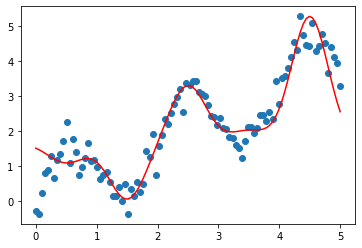

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.55378005 -1.59474072  1.65381399  0.36030973  3.61836575]
interception:  1.6451986893064219


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

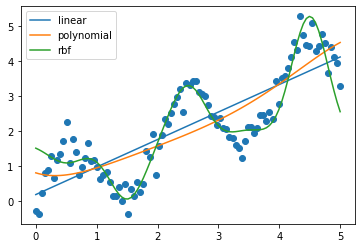

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6599162156806996


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.6102162545781712


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.24625089528914373
